#  Predicting loan cases using Decision Tree



In this notebook, we aim to develop a predictive model using a dataset from Analytics Vidhya's loan prediction challenge. The goal is to determine the eligibility of loan applicants based on their provided information. We will employ Python programming skills for data science, utilize Pandas for data analysis, matplotlib for visualization, and scikit-learn for implementing a decision tree classifier. The key tasks involve data preprocessing steps such as handling NULL values, outliers, and encoding, along with normalization. . The dataset can be obtained from Analytics Vidhya's loan prediction challenge.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Loading Dataset
dataset = pd.read_csv("train_ctrUa4K.csv")


In [ ]:
# Displaying the first few rows of the dataset for a quick overview.
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Checking the shape of the dataset, which returns the number of rows and columns.
dataset.shape


(614, 13)

In [ ]:
# Randomly sampling 550 rows from the dataset using a specific random seed (random_state) for reproducibility.
dataset = dataset.sample(n=550, random_state = 45)

In [ ]:
# Writing the contents of the 'dataset' DataFrame to a new CSV file named 'AneaseAkhtar_1614745.csv'.

dataset.to_csv('AneaseAkhtar_1614745.csv')

In [ ]:
# Displaying the first few rows of the dataset for a quick overview.

data.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,543,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


In [ ]:
# Reading data from the CSV file 'AneaseAkhtar_1614745.csv' and storing it in the variable 'data'.
data = pd.read_csv('AneaseAkhtar_1614745.csv')


In [ ]:
#As we have our own version of the dataset to work on, we drop 'Unnamed: 0' column using drop command.

data=data.drop('Unnamed: 0', axis = 1)


In [ ]:
# Displaying the first few rows of the dataset for a quick overview.
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


In [ ]:
print(data.describe())
# gives me summary statistics for the numerical columns

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       550.000000         550.000000  529.000000        539.000000   
mean       5474.300000        1657.643491  146.542533        342.077922   
std        6376.394128        3042.317529   86.596978         66.279692   
min         150.000000           0.000000    9.000000         12.000000   
25%        2785.500000           0.000000  100.000000        360.000000   
50%        3812.500000        1239.500000  128.000000        360.000000   
75%        5817.250000        2297.250000  168.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      508.000000  
mean         0.840551  
std          0.366455  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
# rows * columns , it gives the total number of elements
print(data.size)


7150


In [ ]:
# it is a 2 dimensional data structure [tables are 2D]
print(data.ndim)


2


In [ ]:
# give rows by columns detail for the table data
data.shape

(550, 13)

In [ ]:
# checking shape of dataframe
print(data.shape)


(550, 13)


In [ ]:
# Extracting unique values from the 'Education' column in the DataFrame.
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

# **Data Analysis**




In [ ]:
# Retrieving the column names from the 'data' DataFrame and storing them in the variable 'columns'.

columns = data.columns
columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Displaying the first few rows of the dataset for a quick overview.
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


For judging loan approval case, 'ApplicantIncome' and 'LoanAmount' look like important attributes. Let's look at these attributes. You will note that these are numeric variables.



<Axes: >

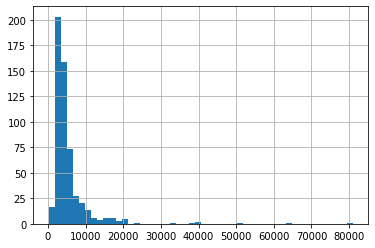

In [ ]:
data['ApplicantIncome'].hist(bins=50)


Histogram and boxplot are used on the same feature to visualise the data distribution.

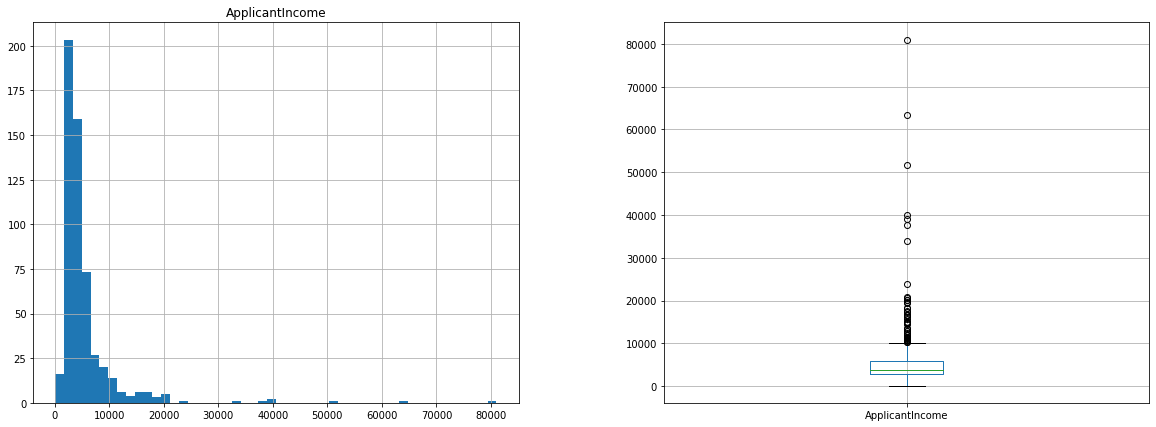

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
data[['ApplicantIncome']].hist(bins=50,ax=ax[0])
data[['ApplicantIncome']].boxplot(ax=ax[1])
plt.show()



**Observation**

Most of the people in the dataset had an income of less than 10,000 because as we can see a lot of the values fall between 0 and 10,000  there are some extreme values in the values in the dataset for example 40,000, 50,000, and 60,000 and the most extreme values reach up to 80,000

#  Are the results of both the plots comparable? Are there any differences in the two plots? What are the key differences?




**Observation**

The histogram is skewed strongly to the right, indicating that the data has a long tail towards higher values. The box plot illustrates the distribution of the data, showing that anything above 10,000 is an outlier and that the majority of the data lies between the minimum line and the maximum line. One of the most obvious distinctions between the plots is that the box plot has a median line along with a minimum and maximum line, whereas the histogram lacks these features, demonstrating that we can extract more information from the box plot.

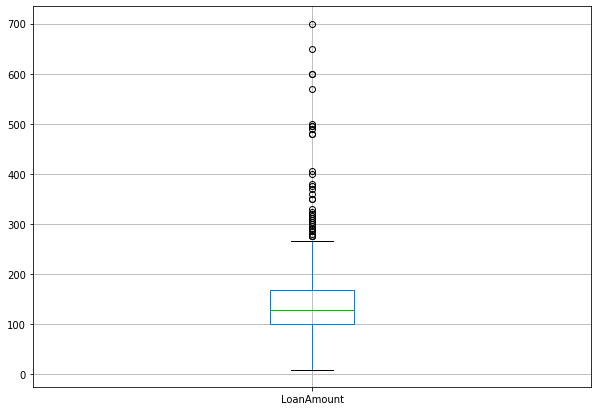

In [ ]:
#Boxplot to observe extreme values for 'Loan Amount'

#Boxplot
plt.figure(figsize=(10,7))
data[['LoanAmount']].boxplot()
plt.show()

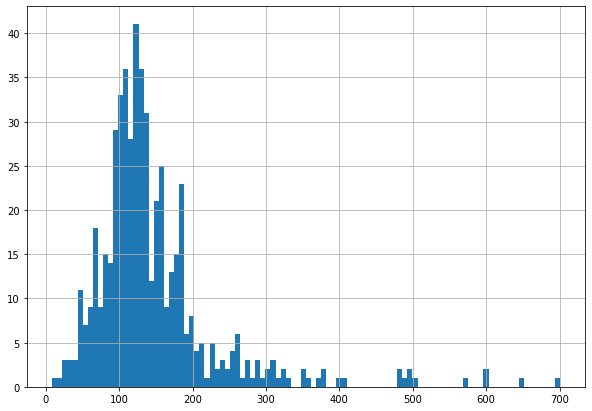

In [ ]:
#Histogram for Loan Amount
plt.figure(figsize=(10,7))
data['LoanAmount'].hist(bins=100)
plt.show()

# **Categorical variable analysis**

In this section we will create a pivot table from dataframe, which is similar to the pivot table in excel. A Pivot
Table is an effective way of analysing and summarising data using aggregate functions such as sum, mean and
count. You can then compare, see patterns and trends in the data.


In [ ]:
# Counting the occurrences of each unique value in the 'Credit_History' column of the DataFrame.
data['Credit_History'].value_counts()


1.0    427
0.0     81
Name: Credit_History, dtype: int64

In [ ]:
# Generating and displaying the frequency table for 'Credit_History', along with the probability of loan approval for each class.

credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
 aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)


Frequency Table for Credit History:
0.0     81
1.0    427
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.086420
1.0                0.786885


In [ ]:
# Counting the occurrences of each unique value in the 'Loan_Status' column of the  DataFrame.

data['Loan_Status'].value_counts()


Y    374
N    176
Name: Loan_Status, dtype: int64

In [ ]:
data.shape

(550, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


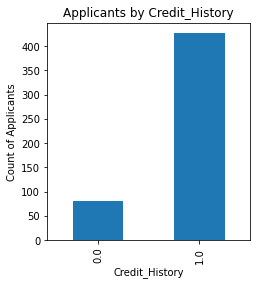

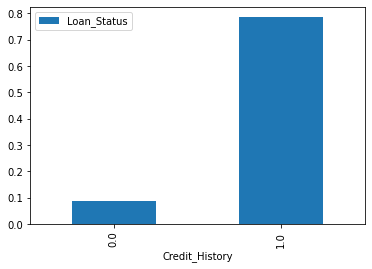

In [ ]:
# Creating a figure with two subplots to visualize the distribution of applicants by 'Credit_History'
# and the probability of getting a loan for each 'Credit_History' class.

# Subplot 1: Bar chart for counting applicants by 'Credit_History'
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')

# Displaying the first subplot
plt.show()

# Subplot 2: Bar chart for the probability of getting a loan by 'Credit_History'
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')

# Displaying the second subplot
plt.show()

# **Data Pre-processing**


*  **Missing values**
*   **Outliers and extreme values**
*   **Dealing with non-numerical fields**



In [ ]:
# Counting the occurrences of each unique value in the 'Gender' column of the DataFrame.

data['Gender'].value_counts()


Male      437
Female    101
Name: Gender, dtype: int64

**Filling in missing values by mean**

As you can see there are several missing values exist in the dataset. For instance, Gender has 13 missing
values and LoanAmount has 22 missing values. We need to deal with the missing values. There are various
ways to deal with it. Here, we will use mean of LoanAmount to replace all it's missing values.


In [ ]:
# Applying a lambda function to calculate the sum of NULL values in each column of the DataFrame.

data.apply(lambda x: sum(x.isnull()), axis=0)


Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     11
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


In [ ]:
# Filling missing values in the 'LoanAmount' column with the mean value of the column.

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [ ]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y


In [ ]:
data.shape


(550, 13)

In [ ]:
# Writing the contents of the 'data' DataFrame to a new CSV file named 'new_train.csv'.

data.to_csv('new_train.csv')

It will be interseting to know how much loan amount could be offered to which sort of people based on their
'Education' and 'Self Employed' statues?
For this, we'll use boxplot and group by multiple variables - **'Education'** and **'Self_Employed'**.
**Note:** LoanAmount is a numeric attribute. Whereas, Group by can be applied on numeric and non-numeric
attributes.


<Axes: title={'center': 'LoanAmount'}, xlabel='[Education, Self_Employed]'>

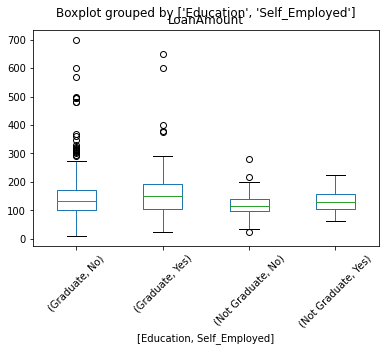

In [ ]:
# Creating a boxplot to visualize the distribution of 'LoanAmount' based on 'Education' and 'Self_Employed' categories.
# This helps in identifying potential outliers and understanding the variability of loan amounts within different groups.

data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
 grid=False, rot = 45, fontsize = 10)


**Input the values**

The above boxplot gives some good insight of each group receiving the loan amount. Data points that form a different patterns are outliers - in circles. We'll deal with the outliers later, for now let’s observe some of the
variations which are visible in the median of loan amount. And, we have seen that **Self_Employed** has 32 missing values. This could be a possible reason of these variations.

So let's deal with this by imputing the values.
Before that let's fill in the missing values by some suitable values - not mean this time!


In [ ]:
# Counting the occurrences of each unique value in the 'Self_Employed' column of the 'data' DataFrame.

data['Self_Employed'].value_counts()

No     449
Yes     74
Name: Self_Employed, dtype: int64

From the frequence table of Self_Employed, we can see that around 86% values are “No”. Therefore, it is safe to impute the missing values as “No” as there is a high probability of success.


In [ ]:
# Filling missing values in the 'Self_Employed' column with 'No' as a default value.

data['Self_Employed'].fillna('No', inplace=True)


In [ ]:
# Counting the occurrences of each unique value in the 'Self_Employed' column of the  DataFrame after filling missing values.

data['Self_Employed'].value_counts()


No     476
Yes     74
Name: Self_Employed, dtype: int64

In [ ]:
# Applying a lambda function to calculate the sum of NULL values in each column of the  DataFrame after the data preprocessing steps.
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

# **Dealing with outliers**

Extreme values are the minimum and the maximum values in the dataset. Values beyond extreme values are considered as outliers.

Outliers are the data points those are far away from all other data point and represent unusual patterns in the dataset.

Depending on the problem domain, outliers could be considered as an activity of interest (e.g., a malicious attack in a network) or could be ignored completely (e.g., times of the day when the network traffic are high).

Most of the learning algorithms are sensitive to outliers. Outliers can negatively influence and distort the result. Therefore, it is important to treat them. Outliers can be treated similar to missing values i.e., by removing or replacing them by appropriate values. It is also possible to take log transformation of outliers to reduce its
influence. In the following steps, we will see how to nullify outliers' impact by taking log transformation.

To better understand this concept, let's visualise ‘LoanAmount’ before and after treating outliers of
‘LoanAmount’.


In [ ]:
# Generating descriptive statistics, including measures of central tendency and dispersion, for the 'data' DataFrame.

data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,539.000000,508.000000
mean,5474.300000,1657.643491,146.542533,342.077922,0.840551
std,6376.394128,3042.317529,84.924603,66.279692,0.366455
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2785.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1239.500000,129.500000,360.000000,1.000000
75%,5817.250000,2297.250000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


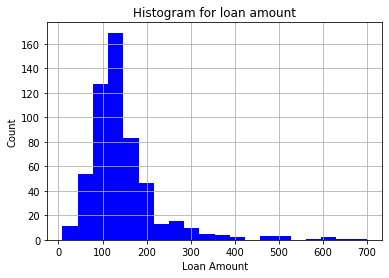

In [ ]:
# Creating a histogram to visualize the distribution of 'LoanAmount' with 20 bins.
# This provides insights into the frequency distribution of loan amounts.

plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<Axes: >

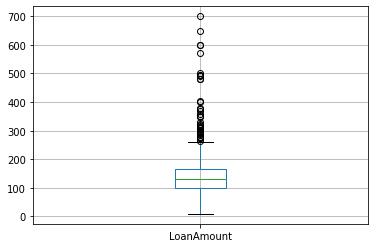

In [ ]:
# Creating a boxplot to visualize the distribution of 'LoanAmount', highlighting potential outliers.

data.boxplot(column='LoanAmount')


In [ ]:
# Creating a new column 'LoanAmount_log' by taking the logarithm of 'LoanAmount'.
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log'].hist(bins = 20)

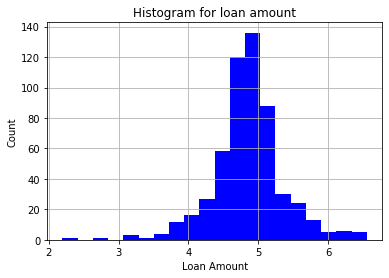

In [ ]:
# Creating a histogram to visualize the distribution of the log-transformed 'LoanAmount' with 20 bins.
# This provides insights into the transformed distribution of loan amounts.

plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()


<Axes: >

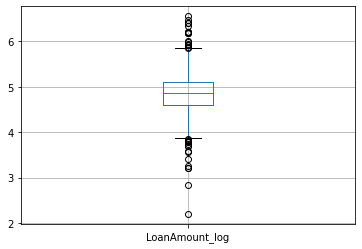

In [ ]:
# Creating a boxplot to visualize the distribution of the log-transformed 'LoanAmount', highlighting potential outliers.

data.boxplot(column='LoanAmount_log')

In [ ]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N,4.634729
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y,4.564348
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y,4.595120
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y,4.852030
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y,4.653960


In [ ]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,539.000000,508.000000,550.000000
mean,5474.300000,1657.643491,146.542533,342.077922,0.840551,4.860837
std,6376.394128,3042.317529,84.924603,66.279692,0.366455,0.501508
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2785.500000,0.000000,100.000000,360.000000,1.000000,4.605170
50%,3812.500000,1239.500000,129.500000,360.000000,1.000000,4.863673
75%,5817.250000,2297.250000,165.000000,360.000000,1.000000,5.105945
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


It is ideal to remove 'LoanAmount' from the dataset as we have transformed it. Command below uses drop() to drop a column.


In [ ]:
data = data.drop(['LoanAmount'], axis=1)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,360.0,0.0,Semiurban,N,4.634729
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,360.0,1.0,Semiurban,Y,4.564348
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,360.0,1.0,Urban,Y,4.595120
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,360.0,1.0,Urban,Y,4.852030
4,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,360.0,1.0,Semiurban,Y,4.653960



*   Checking another variable for outliers and treat it.
*  Generating a new variable by combining two variables e.g., 'ApplicantIncome' and 'CoapplicantIncome'.




In [ ]:
# Creating a new column 'Total_Income' by summing the 'ApplicantIncome' and 'CoapplicantIncome'.

data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

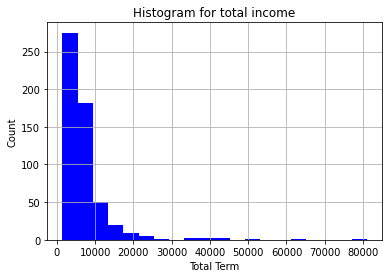

In [ ]:
# Creating a histogram to visualize the distribution of 'Total_Income' with 20 bins.
# This provides insights into the frequency distribution of the total income of applicants.

plt.hist(data['Total_Income'], 20, facecolor='b')
plt.xlabel('Total Term')
plt.ylabel('Count')
plt.title('Histogram for total income')
plt.grid(True)
plt.show()

<Axes: >

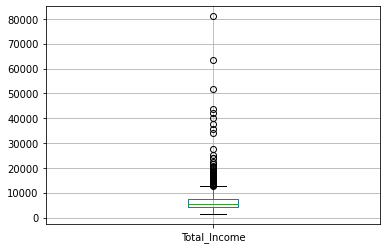

In [ ]:
# Creating a boxplot to visualize the distribution of 'Total_Income', highlighting potential outliers.

data.boxplot(column='Total_Income')

In [ ]:
# Creating a new column 'Total_Income_log' by taking the logarithm of 'Total_Income'.

data['Total_Income_log'] = np.log(data['Total_Income'])

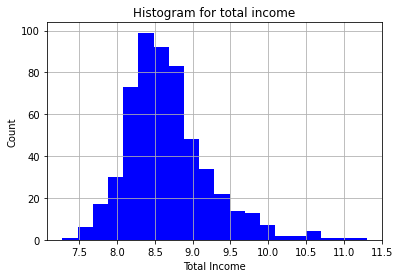

In [ ]:
# Plotting a histogram with 20 bins, using blue color for the bars
plt.hist(data['Total_Income_log'], 20, facecolor='b')

# Labeling the x-axis as 'Total Income'
plt.xlabel('Total Income')

# Labeling the y-axis as 'Count'
plt.ylabel('Count')

# Adding a title to the histogram
plt.title('Histogram for Total Income')

# Adding a grid to the plot
plt.grid(True)

# Displaying the histogram
plt.show()


<Axes: >

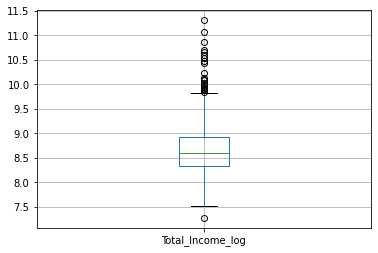

In [ ]:
# Creating a boxplot for the 'Total_Income_log' column in the 'data' DataFrame
data.boxplot(column='Total_Income_log')

# (Optional) Adding a title to the boxplot
plt.title('Boxplot for Total Income Log')

# Displaying the boxplot
plt.show()

data.boxplot(column='Total_Income_log')

**Missing values continuous**

There are more missing values present in the data. Before we build the model, we need to perform some more
pre-processing and convert all the values as numeric:




*   Fill all the missing values.
*   Convert categorical variables into numeric as sklearn works on numeric values only.


Here we will use mode() to fill in the missing values. Mode is the value which occurs most often.







In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
 #0:gets the mode of each column, 1: for each row
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)


In [ ]:
# Applying a lambda function to count the number of missing values in each column
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
Total_Income_log     0
dtype: int64

# Q5. Use LabelEncoder, to convert categorical variables into numeric. Hint: You will first need to identify categorial values

In [ ]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP002287,Female,No,0,Graduate,No,1500,1800.0,360.0,0.0,Semiurban,N,4.634729,3300.0,8.101678
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,360.0,1.0,Semiurban,Y,4.564348,3315.0,8.106213
2,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,360.0,1.0,Urban,Y,4.595120,3029.0,8.015988
3,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,360.0,1.0,Urban,Y,4.852030,4763.0,8.468633
4,LP001972,Male,Yes,0,Not Graduate,No,2875,1750.0,360.0,1.0,Semiurban,Y,4.653960,4625.0,8.439232


In [ ]:
data.shape


(550, 15)

In [ ]:
# Importing the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Creating a list of column names from the 'data' DataFrame
columns = list(data)

# Printing the list of column names
print(columns)


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log', 'Total_Income', 'Total_Income_log']


In [ ]:
# Displaying the data types of each column in the DataFrame
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
Total_Income         float64
Total_Income_log     float64
dtype: object

In [ ]:
# Creating a list of column names for non-numeric columns in the 'data' DataFrame
columns = list(data.select_dtypes(exclude=['float64', 'int64']))

# The list 'columns' now contains the names of columns with non-numeric data types


In [ ]:
columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Above cell will select the columns which are not integer.


In [ ]:
_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']


In [ ]:
# Creating an instance of LabelEncoder
le = LabelEncoder()

# Iterating through each column specified in the 'columns' list
for i in columns:
    # Fit and transform the current column using LabelEncoder
    data[i] = le.fit_transform(data[i])




 The categorical columns specified in 'columns' are now encoded with numerical labels


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


# **Data Normalisation**

As can be seen in the above table each column is in different scales. For example 'ApplicantIncome' column is in the range of thousands while 'Dependents' column is usually below 10.
Having features with different scales
can cause problems to the machine learning model.
Therefore, we perform normalisation across the columns using normalize function in sklearn. There are other ways to scale the dataset within a range, which is know as
'Scaling' (or standardization). This can be performed using 'StandardScaler' method available in sklearn package.

In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
original_data = data.copy()
original_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


In [ ]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


In [ ]:
data[0:5]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


In [ ]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)


In [ ]:
normalized_data = normalize( data_for_norm )


In [ ]:
print(normalized_data[0:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.69166109e-01 4.42999331e-01 8.85998662e-02
  0.00000000e+00 2.46110740e-04 1.14065658e-03 8.12165440e-01
  1.99390990e-03]
 [2.12678644e-04 2.12678644e-04 2.12678644e-04 0.00000000e+00
  0.00000000e+00 7.05029703e-01 0.00000000e+00 7.65643117e-02
  2.12678644e-04 2.12678644e-04 9.70739382e-04 7.05029703e-01
  1.72401836e-03]
 [2.32624934e-04 2.32624934e-04 6.97874801e-04 0.00000000e+00
  0.00000000e+00 7.04620924e-01 0.00000000e+00 8.37449761e-02
  2.32624934e-04 4.65249867e-04 1.06893945e-03 7.04620924e-01
  1.86471863e-03]
 [1.70997466e-04 1.70997466e-04 1.70997466e-04 1.70997466e-04
  0.00000000e+00 3.82863327e-01 4.31597605e-01 6.15590879e-02
  1.70997466e-04 3.41994933e-04 8.29684882e-04 8.14460932e-01
  1.44811479e-03]
 [1.74478763e-04 1.74478763e-04 0.00000000e+00 1.74478763e-04
  0.00000000e+00 5.01626443e-01 3.05337835e-01 6.28123546e-02
  1.74478763e-04 1.74478763e-04 8.12017244e-04 8.06964278e-0

In [ ]:
normalized_data.shape


(550, 13)

In [ ]:
data.shape


(550, 15)

In [ ]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)


In [ ]:
normalized_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log
0,0.000000,0.000000,0.000000,0.000000,0.0,0.369166,0.442999,0.088600,0.000000,0.000246,0.001141,0.812165,0.001994
1,0.000213,0.000213,0.000213,0.000000,0.0,0.705030,0.000000,0.076564,0.000213,0.000213,0.000971,0.705030,0.001724
2,0.000233,0.000233,0.000698,0.000000,0.0,0.704621,0.000000,0.083745,0.000233,0.000465,0.001069,0.704621,0.001865
3,0.000171,0.000171,0.000171,0.000171,0.0,0.382863,0.431598,0.061559,0.000171,0.000342,0.000830,0.814461,0.001448
4,0.000174,0.000174,0.000000,0.000174,0.0,0.501626,0.305338,0.062812,0.000174,0.000174,0.000812,0.806964,0.001472


In [ ]:
normalized_data['Loan_ID'] = data['Loan_ID']


In [ ]:
normalized_data['Loan_Status'] = data['Loan_Status']

The above code inserts column 'Loan_Status' based on the 'index' in the dataframe.


In [ ]:
normalized_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.0,0.369166,0.442999,0.088600,0.000000,0.000246,0.001141,0.812165,0.001994,357,0
1,0.000213,0.000213,0.000213,0.000000,0.0,0.705030,0.000000,0.076564,0.000213,0.000213,0.000971,0.705030,0.001724,212,1
2,0.000233,0.000233,0.000698,0.000000,0.0,0.704621,0.000000,0.083745,0.000233,0.000465,0.001069,0.704621,0.001865,54,1
3,0.000171,0.000171,0.000171,0.000171,0.0,0.382863,0.431598,0.061559,0.000171,0.000342,0.000830,0.814461,0.001448,488,1
4,0.000174,0.000174,0.000000,0.000174,0.0,0.501626,0.305338,0.062812,0.000174,0.000174,0.000812,0.806964,0.001472,269,1


Now, we can see that the dataset is suitable to be fed to a machine learning algorithm. For example, it is in
numeric format and normalised to a fixed range. More analysis and computation could be performed on the
dataset as required, and also, it is in a format which can be acceptable for machine learning models.


In [ ]:
normalized_data.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,Loan_ID,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000115,0.000092,0.000105,0.000037,0.000016,0.573091,0.184227,0.050404,0.000125,0.000157,0.000691,0.757318,0.001238,274.500000,0.680000
std,0.000080,0.000082,0.000164,0.000077,0.000045,0.149547,0.190366,0.025961,0.000081,0.000153,0.000281,0.048872,0.000505,158.915596,0.466901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.007024,0.000000,0.001298,0.000000,0.000000,0.000051,0.696334,0.000099,0.000000,0.000000
25%,0.000059,0.000000,0.000000,0.000000,0.000000,0.464653,0.000000,0.031820,0.000071,0.000000,0.000508,0.706459,0.000892,137.250000,0.000000
50%,0.000119,0.000097,0.000000,0.000000,0.000000,0.614744,0.157375,0.048733,0.000128,0.000141,0.000683,0.762294,0.001229,274.500000,1.000000
75%,0.000170,0.000154,0.000181,0.000000,0.000000,0.706078,0.346630,0.064689,0.000178,0.000237,0.000859,0.809567,0.001528,411.750000,1.000000
max,0.000483,0.000373,0.001148,0.000483,0.000323,0.707105,0.703565,0.173842,0.000483,0.000966,0.001909,0.816215,0.003512,549.000000,1.000000


<Axes: >

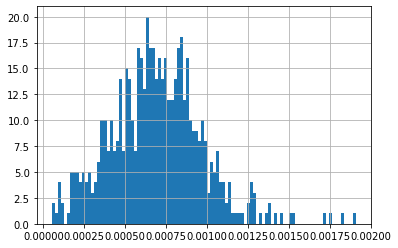

In [ ]:
normalized_data['LoanAmount_log'].hist(bins=100)

You can play with the data yourself by performing some more analysis for fun! An example is provided in the
above cell.
In the next section we will build our first machine learning model, which is a decision tree classifier

# **Building a Decision Tree classifier using sklearn**

**Importing all necessary libraries from sklearn**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
#import pydotplus

**Feature selection**

For a small dataset, using all the features to build the feature space or a model may not be an exhaustive and expensive process. However, for a large dataset, it is not an ideal way to utilise all the features as it will result in a high dimensional feature space, and will be an exhaustive search, expensive and time-consuming job.

Feature selection is an important step of pre-processing, where we tend to remove the features that do not or less likely to contribute to the classification results. We aim to remove such features without compromising on
the classification results.

There could be different ways to perform feature selection. One way is intuitive, where knowing the business
problem and domain knowledge, we simply use our judgement for selecting most discriminating features. There
are other automatic methods such as dimensionality reduction, statistical-based methods to identify feature
importance, etc.

In this notebook, first, we will be building a baseline model using all the features. Then we will be using feature importance method available in sklearn to see the relative importance scores for each feature. You will then be required to build a new module with the identified important features and compare the results of both the
models.


The process to build the model will be the same.

As you can see there are 13 features + 1 target in the final DataFrame. Remember, we have added a few new
features based on the existing ones such as 'LoanAmount_log'. To build the model we can select all or sub-set
of the features.



Let's perform some feature selection.



In [ ]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Total_Income',
 'Total_Income_log',
 'Loan_ID',
 'Loan_Status']

In [ ]:
normalized_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.0,0.369166,0.442999,0.088600,0.000000,0.000246,0.001141,0.812165,0.001994,357,0
1,0.000213,0.000213,0.000213,0.000000,0.0,0.705030,0.000000,0.076564,0.000213,0.000213,0.000971,0.705030,0.001724,212,1
2,0.000233,0.000233,0.000698,0.000000,0.0,0.704621,0.000000,0.083745,0.000233,0.000465,0.001069,0.704621,0.001865,54,1
3,0.000171,0.000171,0.000171,0.000171,0.0,0.382863,0.431598,0.061559,0.000171,0.000342,0.000830,0.814461,0.001448,488,1
4,0.000174,0.000174,0.000000,0.000174,0.0,0.501626,0.305338,0.062812,0.000174,0.000174,0.000812,0.806964,0.001472,269,1


In [ ]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [ ]:
print('Features:')
print(features.head())
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000000  0.000000    0.000000   0.000000            0.0         0.369166   
1  0.000213  0.000213    0.000213   0.000000            0.0         0.705030   
2  0.000233  0.000233    0.000698   0.000000            0.0         0.704621   
3  0.000171  0.000171    0.000171   0.000171            0.0         0.382863   
4  0.000174  0.000174    0.000000   0.000174            0.0         0.501626   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.442999          0.088600        0.000000       0.000246   
1           0.000000          0.076564        0.000213       0.000213   
2           0.000000          0.083745        0.000233       0.000465   
3           0.431598          0.061559        0.000171       0.000342   
4           0.305338          0.062812        0.000174       0.000174   

   LoanAmount_log  Total_Income  Total_Income_log  
0        0.001141 

In [ ]:
normalized_data.head(10)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.0,0.369166,0.442999,0.088600,0.000000,0.000246,0.001141,0.812165,0.001994,357,0
1,0.000213,0.000213,0.000213,0.000000,0.0,0.705030,0.000000,0.076564,0.000213,0.000213,0.000971,0.705030,0.001724,212,1
2,0.000233,0.000233,0.000698,0.000000,0.0,0.704621,0.000000,0.083745,0.000233,0.000465,0.001069,0.704621,0.001865,54,1
3,0.000171,0.000171,0.000171,0.000171,0.0,0.382863,0.431598,0.061559,0.000171,0.000342,0.000830,0.814461,0.001448,488,1
4,0.000174,0.000174,0.000000,0.000174,0.0,0.501626,0.305338,0.062812,0.000174,0.000174,0.000812,0.806964,0.001472,269,1
5,0.000118,0.000000,0.000000,0.000000,0.0,0.706471,0.000000,0.042388,0.000118,0.000235,0.000583,0.706471,0.001024,4,1
6,0.000000,0.000134,0.000000,0.000000,0.0,0.353495,0.459745,0.048113,0.000000,0.000267,0.000640,0.813240,0.001165,42,0
7,0.000000,0.000000,0.000000,0.000000,0.0,0.705789,0.000000,0.060990,0.000000,0.000169,0.000805,0.705789,0.001412,57,0
8,0.000205,0.000000,0.000000,0.000205,0.0,0.481244,0.328214,0.073848,0.000205,0.000205,0.001002,0.809458,0.001699,345,1
9,0.000000,0.000149,0.000000,0.000000,0.0,0.471720,0.340049,0.053621,0.000149,0.000149,0.000750,0.811769,0.001281,103,1


**Building our first baseline model using all the features**

**Partitioning data into Train and Test sets:**



In [ ]:
normalized_data.shape


(550, 15)

In [ ]:
from matplotlib import pyplot

In [ ]:
# Splitting the data into training and testing sets using train_test_split
# features: Input features
# classes: Target variable
# test_size: The proportion of the dataset to include in the test split (33% in this case)
# random_state: Seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33,
 random_state = 45)

# Displaying the shapes of the training and testing sets
print(x_train.shape, x_test.shape)


(368, 13) (182, 13)


In [ ]:
# Creating a Decision Tree classifier with entropy as the criterion and a random seed for reproducibility

decisionTree = DecisionTreeClassifier(criterion='entropy',random_state=45)

# Printing the details of the Decision Tree model
print(decisionTree)


DecisionTreeClassifier(criterion='entropy', random_state=45)


DecisionTreeClassifier(criterion='entropy')


In [ ]:
# Training the Decision Tree model on the training data
dtc_model = decisionTree.fit(x_train, y_train)


Feature: 0, Score: 0.03352
Feature: 1, Score: 0.08283
Feature: 2, Score: 0.01863
Feature: 3, Score: 0.03849
Feature: 4, Score: 0.02957
Feature: 5, Score: 0.05448
Feature: 6, Score: 0.03678
Feature: 7, Score: 0.11199
Feature: 8, Score: 0.26715
Feature: 9, Score: 0.05621
Feature: 10, Score: 0.14539
Feature: 11, Score: 0.07183
Feature: 12, Score: 0.05313


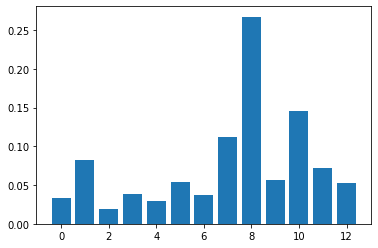

In [ ]:
# feature importance
importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


In [ ]:
# Making predictions using the trained Decision Tree model on the test data
prediction = dtc_model.predict(x_test)


In [ ]:
# Inversely transforming the encoded labels to their original values for both true and predicted values

y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

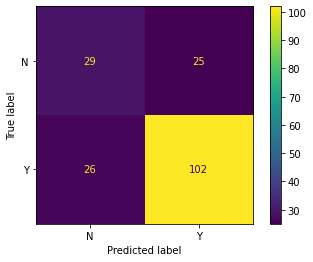

In [ ]:
# Creating a confusion matrix and displaying it using ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


In [ ]:
 #classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.53      0.54      0.53        54
           Y       0.80      0.80      0.80       128

    accuracy                           0.72       182
   macro avg       0.67      0.67      0.67       182
weighted avg       0.72      0.72      0.72       182



**Visualising the decision tree [Optional section ends here]**

# Based on the feature importance, selecting a different set of features to build another decision tree model. aiming to improve the result of the baseline model.


In [ ]:
# Creating features by excluding specified columns and classes by selecting the 'Loan_Status' column
features = normalized_data.drop(['Loan_ID','Loan_Status','Self_Employed',"Dependents","Gender"], axis = 1)
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,357,0,0,0,0,0,1500,1800.0,360.0,0.0,1,0,4.634729,3300.0,8.101678
1,212,1,1,1,0,0,3315,0.0,360.0,1.0,1,1,4.564348,3315.0,8.106213
2,54,1,1,3,0,0,3029,0.0,360.0,1.0,2,1,4.595120,3029.0,8.015988
3,488,1,1,1,1,0,2239,2524.0,360.0,1.0,2,1,4.852030,4763.0,8.468633
4,269,1,1,0,1,0,2875,1750.0,360.0,1.0,1,1,4.653960,4625.0,8.439232


In [ ]:
# Splitting data into training and testing sets, 33% for testing, with a random seed for reproducibility; then, printing the shapes of the sets

x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33,
 random_state = 45)
print(x_train.shape, x_test.shape)

(368, 10) (182, 10)


In [ ]:
# Creating a Decision Tree classifier with entropy as the criterion and a random seed for reproducibility
decisionTree = DecisionTreeClassifier(criterion='entropy', random_state=45)

# Training the Decision Tree model on the training data
dtc_model = decisionTree.fit(x_train, y_train)


In [ ]:
# Making predictions using the trained Decision Tree model on the test data

prediction = dtc_model.predict(x_test)


In [ ]:
# Inversely transforming the encoded labels to their original values for both true and predicted values

y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

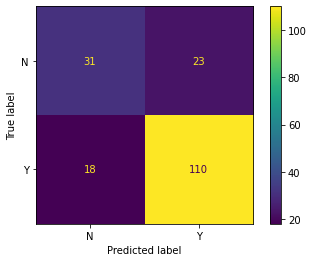

In [ ]:
# Creating a confusion matrix and displaying it using ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [ ]:
# Printing the classification report, which includes precision, recall, F-1 Score and Support
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.63      0.57      0.60        54
           Y       0.83      0.86      0.84       128

    accuracy                           0.77       182
   macro avg       0.73      0.72      0.72       182
weighted avg       0.77      0.77      0.77       182



**Observation**

#Comparison of both models

**Observation**

The goal of this task is to enhance the baseline model by analysing the dataset and identifying the most important features. The columns "Loan_ID," "Loan_Status," "Self_Employed," "Dependents," and "Gender" were removed to help improve the model's accuracy because they had the lowest score when looking at their feature importance score. It was critical not to leave out too many columns, as doing so could result in the loss of important data.

to compare the models The baseline model had an accuracy of 0.72; a new decision tree was constructed after selecting the most important features based on the feature selection analysis. The accuracy of the new model increased to 77, with a 0.83-point increase in precision and a 0.86-point increase in recall, indicating an improvement over the baseline model. This improvement, as previously stated, can be attributed to the fact that the new model only includes the most important features for predicting loan approval.The precision score for approved and unapproved loans is higher for the new model, which suggests that the model is better at identifying whether loans should be approved or not. The F1-Score for the 'not approved' class, however, remains lower than the F1-Score for the 'approved' class, indicating that the model predicts loan approval better than loan rejection. Overall, it outperformed the baseline model. This improvement, as previously stated, can be attributed to the fact that the new model only includes the most important features for predicting loan approval.









Discussion of the results based on the evaluation matrix


**Observation**

In the confusion matrix, the following results were produced: TP = 31, TN = 23, FP = 18, and FN = 110. This shows that the model predicted 31 positives and 23 negatives out of a total of 182 instances in the test set, while it predicted 18 positive but they were actually negative and 110 negative but they were actually positive. This means that the new model predicted correctly that 31 loans would be approved and 23 loans would be turned down. It also got 18 loan approvals wrong and didn't get 110 loan approvals right.The model showed that it has a lot of false negatives, which means that it can't predict loan rejections as well as it can predict loan approvals.When compared to the baseline model, it is clear that the new model outperforms it. As we've talked about, the new model is better than the baseline model because it has more true positives and true negatives and fewer false positives and false negatives. The high number of false negatives in both confusion matrices, however,  The model shows that there is still a problem with the number of loan approvals when the two models are compared. [3]







